<a href="https://colab.research.google.com/github/hris699/TSF-Internship/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Gathering Data

In [3]:
link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Preparing Data

In [6]:
X = data['Hours']
y = data['Scores']

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

# Training Data

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

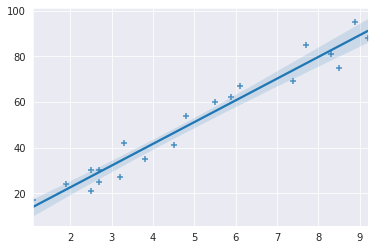

In [10]:
sns.set_style('darkgrid')
sns.regplot(x=X_train, y=y_train, marker="+")
plt.show()

# Predictions

In [11]:
pred = lm.predict(X_test)
print(pred)

[52.11471578 77.8444838  69.26789446 17.80835842 36.86744584]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,47,52.114716
1,86,77.844484
2,76,69.267894
3,20,17.808358
4,30,36.867446


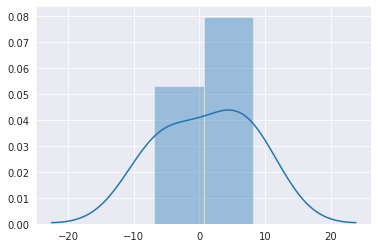

In [13]:
sns.distplot((y_test-pred))
plt.show()

# Evaluation

In [15]:

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred)) 

print('Mean Squared Error:',
      metrics.mean_squared_error(y_test,pred))

print('Root mean squre eror',
      np.sqrt(metrics.mean_squared_error(y_test,pred)))

print('Accuracy',
      np.sqrt(metrics.r2_score(y_test,pred)))

Mean Absolute Error: 5.812284989079747
Mean Squared Error: 37.99182245449741
Root mean squre eror 6.1637506807541635
Accuracy 0.9704720518114212
